In [1]:
#Importing required libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',None)

In [2]:
db=mysql.connector.connect(host="localhost",user="root",password="Simba@123",database="project_new")
mycursor=db.cursor()
print(db)

In [3]:
# Checking conection-
mycursor.execute("Select * from Customers")
output=mycursor.fetchall()
for x in output:
    print(x)

(1, 'Victoria Larson', 'Tuvalu')
(2, 'Mary Chavez', 'New Zealand')
(3, 'Ronald Brandt', 'Maldives')
(4, 'Richard Joseph', 'Falkland Islands (Malvinas)')
(5, 'Cheryl Downs', 'Guyana')
(6, 'Andrew Esparza', 'Macedonia')
(7, 'Christine Soto', 'Poland')
(8, 'Brandon Pearson', 'Puerto Rico')
(9, 'Eddie Mueller', 'Ecuador')
(10, 'Chris Snyder', 'Georgia')
(11, 'Matthew Alvarado', 'Tonga')
(12, 'Kayla Abbott', 'Heard Island and McDonald Islands')
(13, 'Ryan Reynolds', 'Lithuania')
(14, 'Mr. James Hoffman', 'Ireland')
(15, 'Deborah Mitchell', 'San Marino')
(16, 'Kristen Martinez', 'Nauru')
(17, 'James Miller', 'Ecuador')
(18, 'Megan Saunders', 'Monaco')
(19, 'Andrew Brown', 'France')
(20, 'Colton Figueroa', 'Lesotho')
(21, 'Kelli Lopez', 'Panama')
(22, 'Riley Collins', 'Qatar')
(23, 'Tracy Fleming', 'Bulgaria')
(24, 'Brian Wallace', 'El Salvador')
(25, 'Brian Adams', 'Saint Lucia')
(26, 'Maria Sims', 'Congo')
(27, 'Caroline Bailey', 'Cameroon')
(28, 'Robert Mclaughlin', 'New Zealand')
(29, 'Ma

In [4]:
from sqlalchemy import create_engine
user = 'root'
password = 'Simba@123'
host = 'localhost'
port = 3306
database = 'project_new'

def get_connection():
	return create_engine(
		url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
			user, password, host, port, database
		)
	)


if __name__ == '__main__':

	try:
		engine = get_connection()
		print(
			f"Connection to the {host} for user {user} created successfully.")
	except Exception as ex:
		print("Connection could not be made due to the following error: \n", ex)


Connection to the localhost for user root created successfully.


In [5]:
import sqlalchemy

In [6]:
dialect = "mysql"
driver = "pymysql"
login = "root"
password = "Simba@123"
host = "localhost"       # e.g., "localhost"
db_name = "project_new"
my_sql_query = "SELECT * FROM customers"

In [7]:
import pandas as pd
import sqlalchemy
import urllib.parse

dialect = "mysql"
driver = "pymysql"
username = "root"
password = urllib.parse.quote_plus("Simba@123")  # URL encode the password
host = "localhost"
db_name = "project_new"
my_sql_query = "SELECT * FROM customers"

db_uri = f"{dialect}+{driver}://{username}:{password}@{host}/{db_name}"
my_engine = sqlalchemy.create_engine(db_uri)

with my_engine.connect() as my_connection:
    customers_df = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(customers_df.head())


   CUSTOMER_ID     CUSTOMERNAME                      COUNTRY
0            1  Victoria Larson                       Tuvalu
1            2      Mary Chavez                  New Zealand
2            3    Ronald Brandt                     Maldives
3            4   Richard Joseph  Falkland Islands (Malvinas)
4            5     Cheryl Downs                       Guyana


In [8]:
my_sql_query = "SELECT * FROM products"

with my_engine.connect() as my_connection:
    products_df = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(products_df.head())


   PRODUCTROW      PRODUCTNAME  PRODUCTCATEGORY  PRODUCTID
0        1001          Printer      Electronics      10010
1        1002       Smartwatch      Electronics      10015
2        1003           Camera      Electronics      10003
3        1004     Coffee Maker  Home Appliances      10004
4        1007  Air Conditioner  Home Appliances      10001


In [9]:
my_sql_query = "SELECT * FROM orders"
with my_engine.connect() as my_connection:
    orders_df = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(orders_df.head())


   ORDERID  CUSTOMERID  TRANSACTIONID PURCHASEDATE  PURCHASEQUANTITY  \
0    10001         887              1   2024-03-01                 5   
1    10002         560              2   2024-01-26                 4   
2    10003         701              3   2024-05-13                 3   
3    10004         630              4   2023-09-21                 5   
4    10005         631              5   2024-01-25                 4   

   PURCHASEPRICE  
0         689.99  
1          79.27  
2         666.75  
3         316.19  
4         700.24  


In [10]:
my_sql_query = "SELECT * FROM orderdetails"
with my_engine.connect() as my_connection:
    orderdetails_df = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(orderdetails_df.head())

   ORDERDETAILSID  ORDER_ID  PURCHASEQUANTITY  PURCHASEPRICE  PRODUCTID
0               1     10001                 5         689.99      10012
1               2     10002                 4          79.27      10003
2               3     10003                 3         666.75      10005
3               4     10004                 5         316.19      10015
4               5     10005                 4         700.24      10018


# Exploring The Data 

In [12]:
#Basic data type check
customers_df.dtypes

CUSTOMER_ID      int64
CUSTOMERNAME    object
COUNTRY         object
dtype: object

In [13]:
print(products_df.dtypes)

PRODUCTROW          int64
PRODUCTNAME        object
PRODUCTCATEGORY    object
PRODUCTID           int64
dtype: object


In [14]:
print(orders_df.dtypes)

ORDERID               int64
CUSTOMERID            int64
TRANSACTIONID         int64
PURCHASEDATE         object
PURCHASEQUANTITY      int64
PURCHASEPRICE       float64
dtype: object


In [15]:
print(orderdetails_df.dtypes)

ORDERDETAILSID        int64
ORDER_ID              int64
PURCHASEQUANTITY      int64
PURCHASEPRICE       float64
PRODUCTID             int64
dtype: object


In [16]:
# Finding the number of rows and columns
b=customers_df.shape
print("The dataset has",b[0],"rows and",b[1],"columns")

The dataset has 1000 rows and 3 columns


In [17]:
b=products_df.shape
print("The dataset has",b[0],"rows and",b[1],"columns")

The dataset has 20 rows and 4 columns


In [18]:
b=orders_df.shape
print("The dataset has",b[0],"rows and",b[1],"columns")

The dataset has 1000 rows and 6 columns


In [19]:
b=orderdetails_df.shape
print("The dataset has",b[0],"rows and",b[1],"columns")

The dataset has 1000 rows and 5 columns


In [20]:
# Checking nulls:
print(customers_df.isnull().sum())

CUSTOMER_ID     0
CUSTOMERNAME    0
COUNTRY         0
dtype: int64


In [21]:
print(products_df.isnull().sum())

PRODUCTROW         0
PRODUCTNAME        0
PRODUCTCATEGORY    0
PRODUCTID          0
dtype: int64


In [22]:
print(orders_df.isnull().sum())

ORDERID             0
CUSTOMERID          0
TRANSACTIONID       0
PURCHASEDATE        0
PURCHASEQUANTITY    0
PURCHASEPRICE       0
dtype: int64


In [23]:
print(orderdetails_df.isnull().sum())

ORDERDETAILSID      0
ORDER_ID            0
PURCHASEQUANTITY    0
PURCHASEPRICE       0
PRODUCTID           0
dtype: int64


In [24]:
newdf = customers_df.merge(orders_df, how='inner', left_on="CUSTOMER_ID", right_on="CUSTOMERID")

In [25]:
newdf1=newdf.merge(orderdetails_df, how='inner', left_on="ORDERID", right_on="ORDER_ID")

In [26]:
final_data=newdf1.merge(products_df, how='inner', on="PRODUCTID")

In [27]:
final_data

,CUSTOMER_ID,CUSTOMERNAME,COUNTRY,ORDERID,CUSTOMERID,TRANSACTIONID,PURCHASEDATE,PURCHASEQUANTITY_x,PURCHASEPRICE_x,ORDERDETAILSID,ORDER_ID,PURCHASEQUANTITY_y,PURCHASEPRICE_y,PRODUCTID,PRODUCTROW,PRODUCTNAME,PRODUCTCATEGORY
0,100,Christopher Garza,Luxembourg,10572,100,572,2023-08-17,5,146.49,572,10572,5,146.49,10004,1004,Coffee Maker,Home Appliances
1,100,Christopher Garza,Luxembourg,10693,100,693,2023-11-24,3,451.55,693,10693,3,451.55,10015,1002,Smartwatch,Electronics
2,102,Jason Gonzalez,Latvia,10371,102,371,2024-01-24,3,54.79,371,10371,3,54.79,10004,1004,Coffee Maker,Home Appliances
3,104,Tami York,Qatar,10429,104,429,2023-12-12,2,460.43,429,10429,2,460.43,10016,1011,Tablet,Electronics
4,104,Tami York,Qatar,10768,104,768,2024-02-21,2,282.66,768,10768,2,282.66,10002,1013,Blender,Home Appliances
5,105,Brenda Oconnell,Palau,10785,105,785,2024-04-19,4,591.01,785,10785,4,591.01,10009,1023,Microwave,Home Appliances
6,107,Jill Powers,Saint Vincent and the Grenadines,10409,107,409,2024-05-26,3,292.56,409,10409,3,292.56,10015,1002,Smartwatch,Electronics
7,107,Jill Powers,Saint Vincent and the Grenadines,10764,107,764,2023-12-04,4,158.15,764,10764,4,158.15,10011,1020,Refrigerator,Home Appliances
8,108,Zachary Levy,Oman,10221,108,221,2024-02-22,5,447.62,221,10221,5,447.62,10001,1007,Air Conditioner,Home Appliances
9,108,Zachary Levy,Oman,10535,108,535,2023-12-06,3,737.53,535,10535,3,737.53,10018,1031,Toaster,Home Appliances


In [28]:
# Changing the date column to date-
final_data['PURCHASEDATE']= pd.to_datetime(final_data['PURCHASEDATE'])

In [29]:
# Checking the info
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CUSTOMER_ID         1000 non-null   int64         
 1   CUSTOMERNAME        1000 non-null   object        
 2   COUNTRY             1000 non-null   object        
 3   ORDERID             1000 non-null   int64         
 4   CUSTOMERID          1000 non-null   int64         
 5   TRANSACTIONID       1000 non-null   int64         
 6   PURCHASEDATE        1000 non-null   datetime64[ns]
 7   PURCHASEQUANTITY_x  1000 non-null   int64         
 8   PURCHASEPRICE_x     1000 non-null   float64       
 9   ORDERDETAILSID      1000 non-null   int64         
 10  ORDER_ID            1000 non-null   int64         
 11  PURCHASEQUANTITY_y  1000 non-null   int64         
 12  PURCHASEPRICE_y     1000 non-null   float64       
 13  PRODUCTID           1000 non-null   int64        

# DATA ANALYSIS

In [31]:
# Total revenue
final_data["PURCHASEPRICE_x"].sum()

489274.72

In [32]:
# Average order amount
round(final_data["PURCHASEPRICE_x"].mean(),2)

489.27

In [33]:
# Total orders
len(final_data["ORDERID"])

1000

In [34]:
# Category wise total revenue
final_data.groupby(['PRODUCTCATEGORY'], sort=True)['PURCHASEPRICE_x'].sum()

PRODUCTCATEGORY
Electronics        248194.56
Home Appliances    241080.16
Name: PURCHASEPRICE_x, dtype: float64

In [35]:
# Category wise total quantity sold:
final_data.groupby(['PRODUCTCATEGORY'], sort=True)['PURCHASEQUANTITY_y'].sum()

PRODUCTCATEGORY
Electronics        1480
Home Appliances    1573
Name: PURCHASEQUANTITY_y, dtype: int64

In [36]:
# Product wise total revenue:
new_df = final_data.groupby(['PRODUCTNAME'], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
print(new_df)

        PRODUCTNAME  PURCHASEPRICE_x
8         Microwave         30970.75
14       Smartwatch         29407.68
17          Toaster         29116.03
6            Heater         28828.67
5        Headphones         27748.78
10     Refrigerator         27730.95
9           Printer         27360.29
16       Television         25188.60
2            Camera         24985.70
0   Air Conditioner         24812.05
7            Laptop         24493.14
12       Smart Bulb         22575.66
4   Electric Kettle         22566.28
13       Smartphone         22508.32
15           Tablet         22028.51
18   Vacuum Cleaner         21921.68
11           Router         21897.88
19  Washing Machine         19987.46
3      Coffee Maker         19517.16
1           Blender         15629.13


In [37]:
# Product wise total quantity:
new_df = final_data.groupby(['PRODUCTNAME'], sort=True)['PURCHASEQUANTITY_y'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEQUANTITY_y', ascending=False)
new_df.rename(columns={'PURCHASEQUANTITY_y':'TOTALQUANTITY'},inplace= True)
print(new_df)

        PRODUCTNAME  TOTALQUANTITY
17          Toaster            191
6            Heater            183
8         Microwave            180
10     Refrigerator            167
0   Air Conditioner            165
9           Printer            163
16       Television            161
14       Smartwatch            159
7            Laptop            154
12       Smart Bulb            152
4   Electric Kettle            151
3      Coffee Maker            150
15           Tablet            150
11           Router            148
19  Washing Machine            148
5        Headphones            142
2            Camera            136
18   Vacuum Cleaner            133
13       Smartphone            115
1           Blender            105


In [38]:
# Top 10 customers in terms of Total spent
final_data.groupby(['CUSTOMERNAME'])['PURCHASEPRICE_x'].sum().nlargest(10)

CUSTOMERNAME
Laura Bradford     4315.46
Daniel Medina      3173.35
Emma Cunningham    3094.51
Zachary Levy       2871.47
Michael Hester     2814.04
Chad Green         2794.36
Kevin Chang        2753.67
Craig Chang        2631.00
Cynthia Walter     2509.07
Laurie Silva       2420.14
Name: PURCHASEPRICE_x, dtype: float64

In [39]:
# Top 10 countries by revenue:
final_data.groupby(['COUNTRY'])['PURCHASEPRICE_x'].sum().nlargest(10)

COUNTRY
Oman            9442.31
Romania         7060.78
Nauru           6866.70
Saint Martin    6414.64
Sudan           6229.82
Macao           6205.92
Sri Lanka       5626.69
Slovenia        5567.52
South Africa    5433.68
Israel          5258.98
Name: PURCHASEPRICE_x, dtype: float64

In [40]:
# Total Quantity sold
final_data["PURCHASEQUANTITY_y"].sum()

3053

In [41]:
# Year wise revenue:
new_df = final_data.groupby([final_data.PURCHASEDATE.dt.year], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
new_df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PURCHASEDATE':'Year'},inplace= True)
new_df['Growth_Rate'] = new_df['Total_Revenue'].pct_change(periods=1) * 100
new_df

,Year,Total_Revenue,Growth_Rate
0,2023,262346.07,NaN
1,2024,226928.65,-13.500267


In [42]:
# month wise revenue:
new_df = final_data.groupby([final_data.PURCHASEDATE.dt.month ], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
new_df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PURCHASEDATE':'Month'},inplace= True)
new_df

,Month,Total_Revenue
11,12,51910.42
6,7,47956.69
8,9,46764.80
0,1,43575.14
4,5,42799.97
1,2,41393.77
10,11,39839.29
9,10,38368.97
2,3,37442.66
3,4,34165.64


In [43]:
# Year wise total quantity:
new_df = final_data.groupby([final_data.PURCHASEDATE.dt.year], sort=True)['PURCHASEQUANTITY_y'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEQUANTITY_y', ascending=False)

new_df.rename(columns={'PURCHASEDATE':'Year'},inplace= True)

new_df

,Year,PURCHASEQUANTITY_y
0,2023,1651
1,2024,1402


In [44]:
# Quarter wise revenue:
new_df = final_data.groupby([final_data.PURCHASEDATE.dt.quarter ], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
new_df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PURCHASEDATE':'Quarter'},inplace= True)
new_df

,Quarter,Total_Revenue
3,4,130118.68
2,3,128214.95
0,1,122411.57
1,2,108529.52


In [45]:
# Creating a copy of the original data and extracting year,month and quarter of purchase date into new columns
final_data_copy=final_data
final_data_copy['Year']=final_data_copy['PURCHASEDATE'].dt.year
final_data_copy['Month']=final_data_copy['PURCHASEDATE'].dt.month
final_data_copy['Quarter']=final_data_copy['PURCHASEDATE'].dt.quarter

In [46]:
# Year wise month wise revenue 
new_df = final_data_copy.groupby(['Year','Month'], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
new_df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)

new_df

,Year,Month,Total_Revenue
6,2023,12,51910.42
1,2023,7,47956.69
3,2023,9,46764.80
7,2024,1,43575.14
11,2024,5,42799.97
8,2024,2,41393.77
5,2023,11,39839.29
4,2023,10,38368.97
9,2024,3,37442.66
10,2024,4,34165.64


In [47]:
#Year wise quarter wise total revenue:
new_df = final_data_copy.groupby(['Year','Quarter'], sort=True)['PURCHASEPRICE_x'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEPRICE_x', ascending=False)
new_df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)

new_df

,Year,Quarter,Total_Revenue
2,2023,4,130118.68
1,2023,3,128214.95
3,2024,1,122411.57
4,2024,2,104517.08
0,2023,2,4012.44


In [48]:
# Year wise quarter wise total quantity:
new_df = final_data_copy.groupby(['Year','Quarter'], sort=True)['PURCHASEQUANTITY_y'].sum().reset_index()
new_df = new_df.sort_values(by = 'PURCHASEQUANTITY_y', ascending=False)

new_df

,Year,Quarter,PURCHASEQUANTITY_y
2,2023,4,831
1,2023,3,792
3,2024,1,772
4,2024,2,630
0,2023,2,28


In [49]:
# Country wise customer count-
# Year wise number of customers:
new_df = final_data.groupby(["COUNTRY"], sort=True)['CUSTOMER_ID'].count().reset_index()
new_df = new_df.sort_values(by = 'CUSTOMER_ID', ascending=False)
new_df.rename(columns={'CUSTOMER_ID':'Customer_Count'},inplace= True)

new_df

,COUNTRY,Customer_Count
147,Oman,16
184,Sri Lanka,14
159,Romania,13
185,Sudan,12
166,Saint Martin,11
103,Korea,11
178,Slovenia,11
135,Nauru,11
120,Martinique,10
94,Israel,10


In [50]:
# Top products which is most sold in diff years and their quarter
df=final_data_copy.groupby(['Year','Quarter','PRODUCTNAME']).agg(total_quantity=("PURCHASEQUANTITY_y","sum"))
df=df.reset_index()
idx = df.groupby(['Year','Quarter'])['total_quantity'].idxmax()
df = df.loc[idx]
df

,Year,Quarter,PRODUCTNAME,total_quantity
2,2023,2,Heater,6
23,2023,3,Television,67
39,2023,4,Smart Bulb,59
53,2024,1,Heater,55
75,2024,2,Microwave,46


In [51]:
# Top product in terms of quantity each month
df=final_data_copy.groupby(['Month','PRODUCTNAME']).agg(total_quantity=("PURCHASEQUANTITY_y","sum"))
df=df.reset_index()
idx = df.groupby('Month')['total_quantity'].idxmax()
df = df.loc[idx]
df

,Month,PRODUCTNAME,total_quantity
11,1,Router,30
27,2,Laptop,25
57,3,Vacuum Cleaner,25
66,4,Laptop,20
86,5,Microwave,24
114,6,Toaster,22
127,7,Refrigerator,32
154,8,Toaster,26
173,9,Television,28
177,10,Air Conditioner,28


# Plots

C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\1961988416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="PRODUCTCATEGORY",


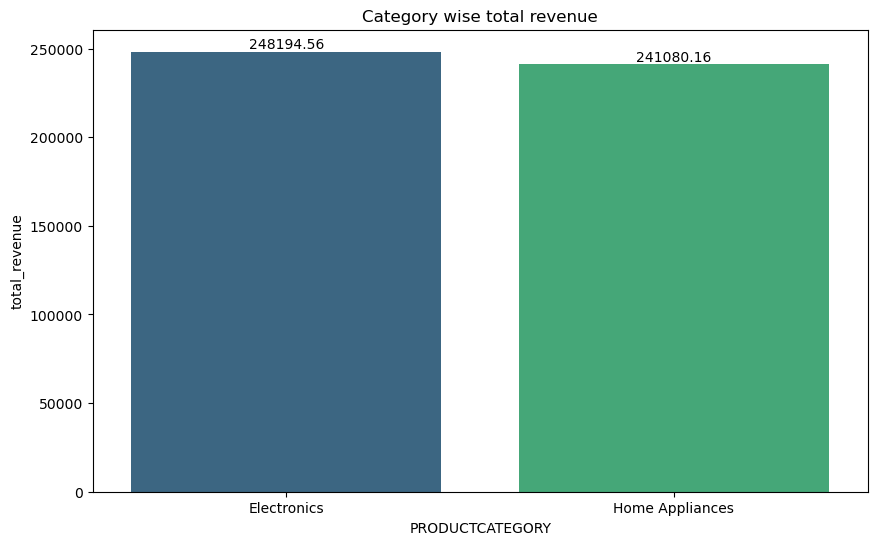

In [53]:
df = final_data.groupby(['PRODUCTCATEGORY']).agg(total_revenue=("PURCHASEPRICE_x", 'sum')).reset_index()
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(df))
ax = sns.barplot(x="PRODUCTCATEGORY", 
                 y="total_revenue", 
                 data=df, 
                 palette=colors)
ax.set_title('Category wise total revenue')
for index, row in df.iterrows():
    ax.text(x=index, y=row['total_revenue'], s=f"{row['total_revenue']}", ha='center', va='bottom')
plt.show()


C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\1455296318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="PRODUCTCATEGORY",


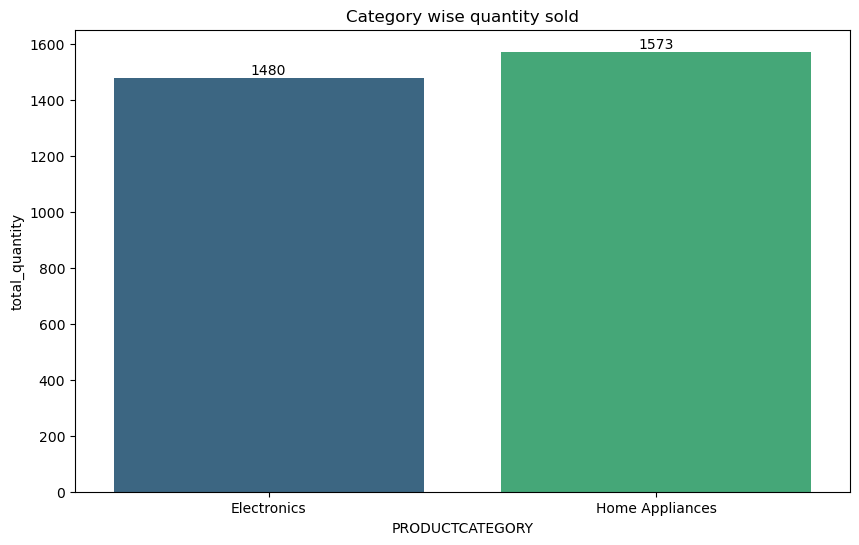

In [54]:
# Category wise quantity
df = final_data.groupby(['PRODUCTCATEGORY']).agg(total_quantity=("PURCHASEQUANTITY_y", 'sum')).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="PRODUCTCATEGORY", 
                 y="total_quantity", 
                 data=df, 
                 palette='viridis')
ax.set_title('Category wise quantity sold')
for index, row in df.iterrows():
    ax.text(x=index, y=row['total_quantity'], s=f"{row['total_quantity']}", ha='center', va='bottom')
plt.show()


C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\998356705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="PRODUCTCATEGORY",


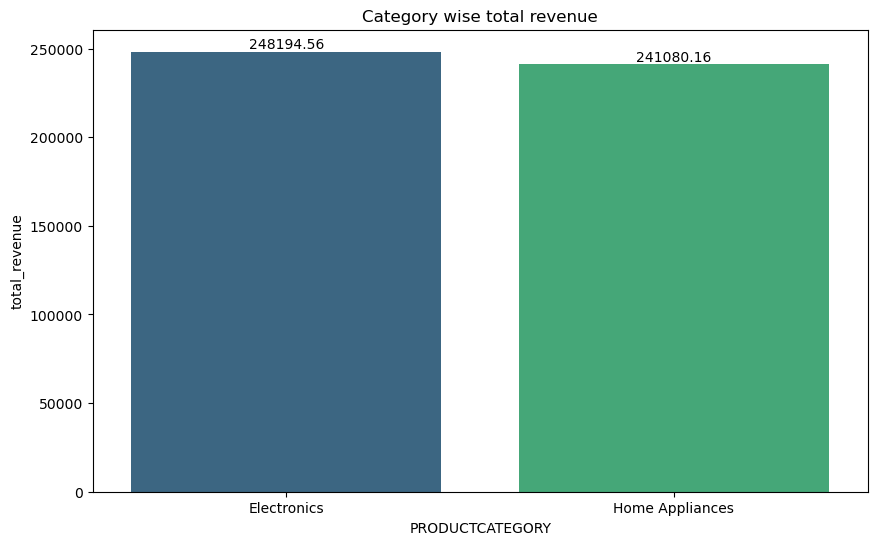

In [55]:
# Category wise total revenue
df = final_data.groupby(['PRODUCTCATEGORY']).agg(total_revenue=("PURCHASEPRICE_x", 'sum')).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="PRODUCTCATEGORY", 
                 y="total_revenue", 
                 data=df, 
                 palette='viridis')
ax.set_title('Category wise total revenue')
for index, row in df.iterrows():
    ax.text(x=index, y=row['total_revenue'], s=f"{row['total_revenue']}", ha='center', va='bottom')
plt.show()

C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\2918055492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PRODUCTNAME",
C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\2918055492.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="PRODUCTNAME",


[Text(0.5, 1.0, 'Top 5 products with highest revenue')]

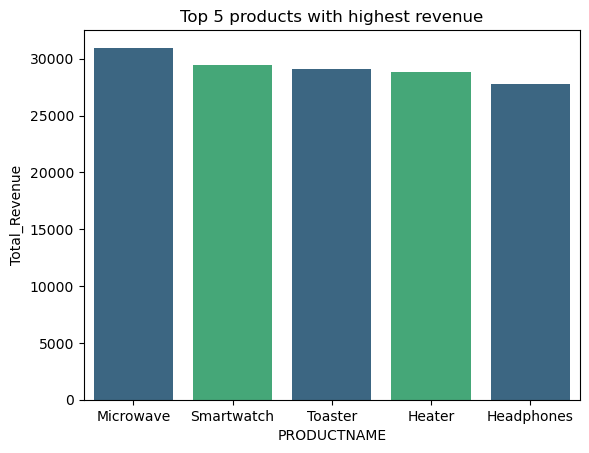

In [56]:
df = final_data.groupby(['PRODUCTNAME'])['PURCHASEPRICE_x'].sum().nlargest(5).reset_index()
df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)
sns.barplot(x="PRODUCTNAME", 
           y="Total_Revenue", 
           data=df,palette=colors).set(title="Top 5 products with highest revenue")

C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\3868044731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="PRODUCTNAME",
C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\3868044731.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="PRODUCTNAME",


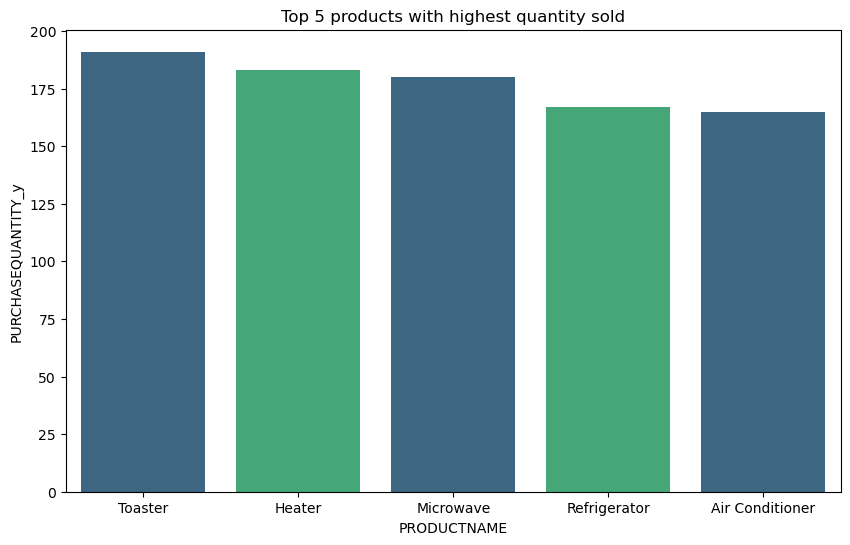

In [57]:
df = final_data.groupby(['PRODUCTNAME'])['PURCHASEQUANTITY_y'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="PRODUCTNAME", 
                 y="PURCHASEQUANTITY_y", 
                 data=df, 
                 palette=colors)
ax.set_title("Top 5 products with highest quantity sold")
plt.show()

<Axes: title={'center': 'Top 5 products with highest quantity sold'}, ylabel='CUSTOMERNAME'>

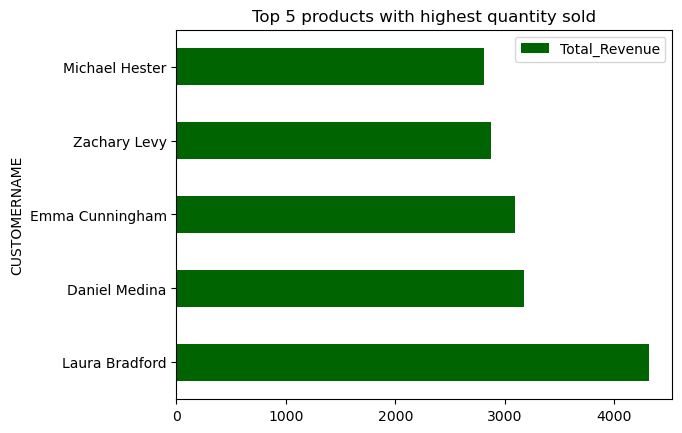

In [58]:
# Top 5 customers based on revenue:
df = final_data.groupby(['CUSTOMERNAME'])['PURCHASEPRICE_x'].sum().nlargest(5).reset_index()
df.rename(columns={'PURCHASEPRICE_x':'Total_Revenue'},inplace= True)
df.plot.barh(x='CUSTOMERNAME',y='Total_Revenue',title="Top 5 products with highest quantity sold",color="darkgreen")

C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_3928\230998725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="YEAR",


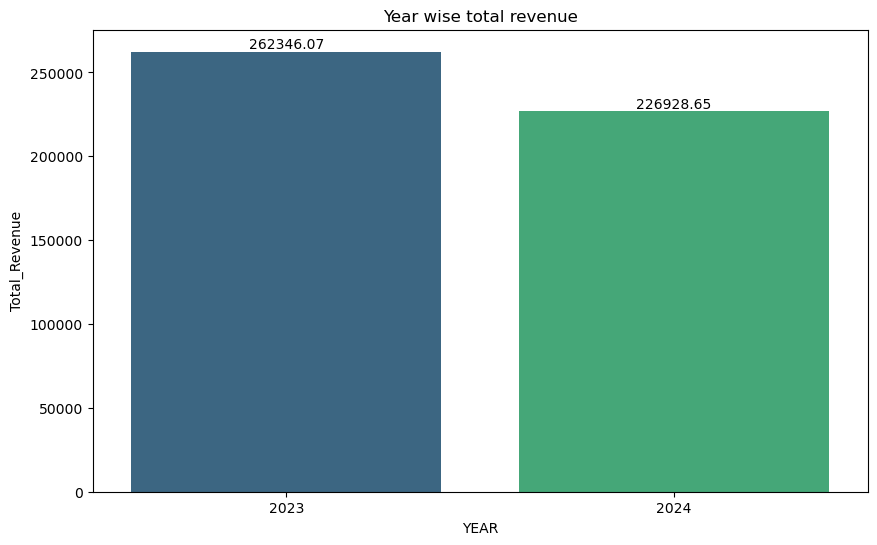

In [59]:
df = final_data_copy.groupby(['Year'])['PURCHASEPRICE_x'].sum().reset_index()
df.rename(columns={'PURCHASEPRICE_x': 'Total_Revenue', 'Year': 'YEAR'}, inplace=True)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="YEAR",
                 y="Total_Revenue",
                 data=df,
                 palette='viridis')  # Example color palette
ax.set_title("Year wise total revenue")
for index, row in df.iterrows():
    ax.text(x=index, y=row['Total_Revenue'], s=f"{row['Total_Revenue']}", ha='center', va='bottom')
plt.show()

# REPORT

# 1. Data Period

## The data period is of the years 2023 and 2024.

# 2. Total Orders

## There are 1000 orders in the given data.

# 3. Total and Average Revenue

## The total revenue is 489274.72 and the average revenue per order is 489.27.

# 4. Total Products Sold

## The total number of products sold is 3053.

# 5. Categories and the Revenue 

## There are 2 categories Electronics with the revenue of 248194.56 and Home Appliances with the revenue of  241080.16.Electronics has a slightly more revenue.

# 6. Categories and Quantity Sold

## The quantity sold for each category is Electronics 1480 and Home Appliances 1573.

# 7. Top 3 Products with Highest Revenue

## The top 3 products with highest revenue are Microwave, Smartwatch and Toaster.

# 8. Top 3 Products with Highest Quantity Sold

## The top 3 products in terms of quantity are Toaster, Heater and Microwave.

# 9. Top 5 Countries with most Revenue

## Top 5 Countries with most revenue are Oman, Nauru, Saint Martin and Sudan

# 10. Year Wise Revenue

## The revenue in the year 2023 was 262346.07 and the year 2024 was 226928.65, There is a 13.50 drop in the revenue.

# 11. Top Month in terms of Revenue

## December 2023 is the top month with a revenue of 51910.42.

# 12. Year wise Quantity sold

## In 2023 the total quantity sold was 1651 where as in 2024 it was 1402. There is a decrease in the quantity sold.

# 13. Best Performing Quarter as per Revenue 

## Quarter 4 from the year 2023 was the best performing in terms of revenue with a total revenue of 130118.68.

# 14. Best Performing Quarter in terms of Quantity Sold

## Quarter 4 from the year 2023	has the highest quantity sold at 831.

# 15. Countries with most Customers

## The top 5 countries with most customers are Oman, Sri Lanka, Romania, Sudan	and Saint Martin.

# 16. Month wise best Product in terms of Quantity Sold

## Across the 2 years, in the Month of January, Routers were the best sold product, In February it is Laptop, March- Vaccum Cleaner, April- Laptop, May-Microwave, June-Toaster, July- Referigerator, August- Toaster, Sept- Telivison, October- AC'S, November- Microwave and December- Smart Bulb.
